In [2]:
import pandas as pd
import numpy as np

# vizualizatsiya
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# modellar
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Pipline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

# o'lchovlar
import sklearn.metrics as metrics

# modelni saqlash uchun
import joblib 

**Quyida jadvaldagi datasetdagi ustun nomlari o‘zbek tiliga qisqacha tarjima qilinib, har biriga qisqa tushuntirish berilgan:**

1. id - Identifikator: Har bir qator uchun noyob raqam, ma'lumotlarni aniqlash uchun ishlatiladi.
2. N_Days - Kunlar soni: Bemorni kuzatish davomiyligi, kunlarda.
3. Drug - Dori: Bemorga berilgan dori turi.
4. Age - Yosh: Bemorning yoshi.
5. Sex - Jins: Bemorning jinsi (erkak yoki ayol).
6. Ascites - Assit: Qorin bo‘shlig‘ida suyuqlik to‘planishi (jigar kasalligi belgisi).
7. Hepatomegaly - Gepatomegaliya: Jigar kattalashishi.
8. Spiders - O‘rgimchak naqshlari: Teri ostidagi qon tomirlarining o‘rgimchak to‘riga o‘xshash ko‘rinishi.
9. Edema - Shish: Tana a'zolarida (ko‘pincha oyoqlarda) suyuqlik tufayli shish paydo bo‘lishi.
10. Bilirubin - Bilirubin: Qonda bilirubin darajasi, jigar faoliyatini ko‘rsatadi.
11. Cholesterol - Xolesterin: Qondagi xolesterin darajasi.
12. Albumin - Albumin: Qondagi oqsil turi, jigar sog‘lig‘ini ko‘rsatadi.
13. Copper - Mis: Qondagi mis miqdori.
14. Alk_Phos - Alkalin fosfataza: Jigar va suyaklar bilan bog‘liq ferment darajasi.
15. SGOT - SGOT (AST): Jigar fermenti, jigar shikastlanishini ko‘rsatadi.
16. Tryglicerides - Triglitseridlar: Qondagi yog‘ turi, yurak va jigar sog‘lig‘i bilan bog‘liq.
17. Platelets - Trombotsitlar: Qonda trombotsitlar soni, qon ivishi uchun muhim.
18. Prothrombin - Protrombin: Qon ivish vaqtini o‘lchaydigan ko‘rsatkich.
19. Stage - Bosqich: Kasallikning rivojlanish bosqichi.
20. Status - Holati: Bemorni holati (masalan, sog‘lom yoki kasal).

In [3]:
# modelni o'qish uchun dataset
df_train = pd.read_csv("/kaggle/input/multiclassificationtask/train.csv", index_col=0)  # asosiy dataframe
df_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,2178.0,D-penicillamine,16374.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,C
1,2644.0,D-penicillamine,17774.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,C
2,3069.0,Placebo,17844.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,C
3,2216.0,Placebo,19221.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,C
4,2256.0,Placebo,21600.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,D


In [4]:
df_train_for_duplicates = pd.read_csv("/kaggle/input/multiclassificationtask/train.csv") # duplicat qiymatlani topish uchun 'id' ustunini tekshiramiz
df_train_for_duplicates['id'].duplicated().sum()

0

# Malumotlarga ishlov berish

## Data analysis and preprocessing

In [5]:
df = df_train.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         15000 non-null  float64
 1   Drug           8494 non-null   object 
 2   Age            15000 non-null  float64
 3   Sex            15000 non-null  object 
 4   Ascites        8502 non-null   object 
 5   Hepatomegaly   8492 non-null   object 
 6   Spiders        8491 non-null   object 
 7   Edema          15000 non-null  object 
 8   Bilirubin      15000 non-null  float64
 9   Cholesterol    6701 non-null   float64
 10  Albumin        15000 non-null  float64
 11  Copper         8399 non-null   float64
 12  Alk_Phos       8488 non-null   float64
 13  SGOT           8486 non-null   float64
 14  Tryglicerides  6666 non-null   float64
 15  Platelets      14436 non-null  float64
 16  Prothrombin    14984 non-null  float64
 17  Stage          15000 non-null  float64
 18  Status     

*Bizni target ustunimiz `Status` ustuni*

In [7]:
# corr_matrix = df.corrwith(df["Status"], numeric_only=True).abs().sort_values(ascending=False)
# corr_matrix

In [8]:
# corr_matrix = df.corr().abs()
# corr_matrix.style.background_gradient(cmap='YlOrRd')

In [9]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.000000,15000.000000,6701.000000,15000.000000,8399.000000,8488.000000,8486.000000,6666.000000,14436.000000,14984.000000,15000.000000
mean,1971.721267,19298.658267,1.845433,329.177302,3.526103,75.647339,1618.598233,106.483631,111.387886,252.917983,10.626111,3.024800
std,1333.733576,3797.580260,2.674859,180.320802,0.372268,74.830472,1767.240078,57.206017,55.056133,94.049175,0.731416,0.871303
min,3.000000,400.000000,0.200000,120.000000,0.500000,2.000000,3.400000,0.900000,19.000000,32.000000,9.000000,1.000000
25%,1095.000000,16658.000000,0.600000,242.000000,3.290000,31.000000,720.000000,71.000000,80.000000,181.000000,10.100000,2.000000
50%,1786.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,248.000000,10.600000,3.000000
75%,2635.000000,22347.000000,1.800000,364.000000,3.770000,89.000000,1664.000000,130.200000,133.000000,311.000000,11.000000,4.000000
max,38320.000000,129398.000000,28.000000,2078.000000,4.640000,662.000000,13862.400000,2653.000000,1669.000000,1024.000000,18.000000,4.000000


In [10]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,2178.0,D-penicillamine,16374.0,F,N,N,N,N,0.5,263.0,3.20,43.0,1110.0,106.95,67.0,430.0,9.6,3.0,C
1,2644.0,D-penicillamine,17774.0,F,N,N,N,N,0.8,280.0,3.60,22.0,678.0,62.00,80.0,427.0,13.0,3.0,C
2,3069.0,Placebo,17844.0,F,N,N,N,N,1.1,408.0,4.40,54.0,2108.0,142.60,137.0,203.0,10.6,3.0,C
3,2216.0,Placebo,19221.0,F,N,Y,Y,N,0.8,252.0,3.70,36.0,843.0,55.80,56.0,336.0,9.6,4.0,C
4,2256.0,Placebo,21600.0,F,N,N,N,N,4.7,348.0,3.06,464.0,961.0,120.90,146.0,298.0,11.0,2.0,D


### Missing valuelarni to'ldirish

In [11]:
numerical_features = [
    'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
    'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
    'Prothrombin', 'Stage'
]

categorical_features = [
    'Drug', 'Sex', 'Ascites', 'Hepatomegaly',
    'Spiders', 'Edema'
]

In [12]:
for col in numerical_features:
    df[col] = df[col].fillna(df[col].mean())

for col in categorical_features:
    if df[col].mode().empty:
        df[col] = df[col].fillna("Unknown")
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

    

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         15000 non-null  float64
 1   Drug           15000 non-null  object 
 2   Age            15000 non-null  float64
 3   Sex            15000 non-null  object 
 4   Ascites        15000 non-null  object 
 5   Hepatomegaly   15000 non-null  object 
 6   Spiders        15000 non-null  object 
 7   Edema          15000 non-null  object 
 8   Bilirubin      15000 non-null  float64
 9   Cholesterol    15000 non-null  float64
 10  Albumin        15000 non-null  float64
 11  Copper         15000 non-null  float64
 12  Alk_Phos       15000 non-null  float64
 13  SGOT           15000 non-null  float64
 14  Tryglicerides  15000 non-null  float64
 15  Platelets      15000 non-null  float64
 16  Prothrombin    15000 non-null  float64
 17  Stage          15000 non-null  float64
 18  Status     

## Visualization

In [14]:
df["Status"].value_counts()

Status
C     10053
D      4565
CL      381
Y         1
Name: count, dtype: int64

In [15]:
status_rate = df["Status"].value_counts()/len(df)*100
status_rate

Status
C     67.020000
D     30.433333
CL     2.540000
Y      0.006667
Name: count, dtype: float64

In [16]:
# Status ustunida Y qiymati nisbatan kamligi uchun tashlab yuboramiz
df = df[df["Status"] != "Y"] 

In [17]:
replaceable = {"C":0, "D":1, 'CL':2}
df["Status"] = df["Status"].map(replaceable)

In [18]:
status_rate = df["Status"].value_counts()/len(df)*100
status_rate

Status
0    67.024468
1    30.435362
2     2.540169
Name: count, dtype: float64

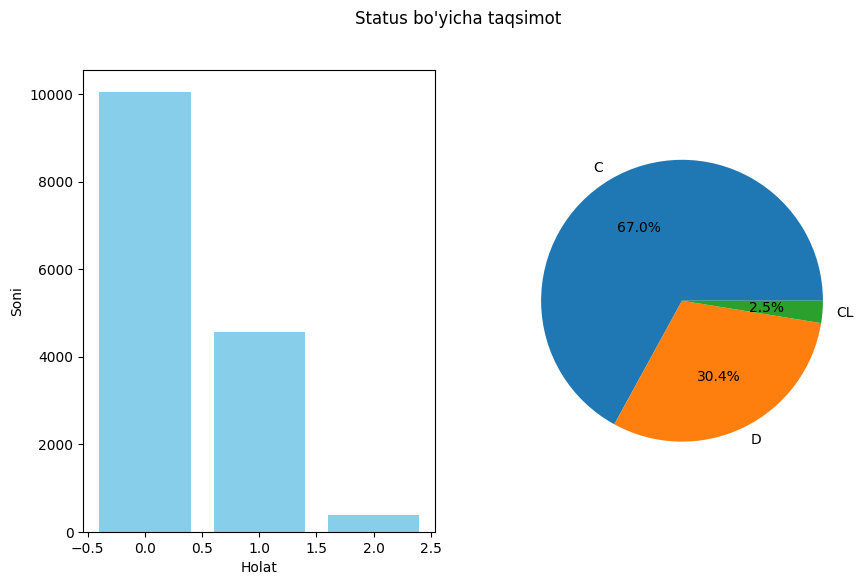

In [19]:
classes = df["Status"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(10,6))

# 1-grafig Bar plot
ax[0].bar(classes.index, classes.values, color='skyblue')
ax[0].set_xlabel("Holat")
ax[0].set_ylabel("Soni")

# 2-grafig Pie chart
ax=ax[1].pie(classes.values, labels=["C", "D", "CL"], autopct='%1.1f%%')

plt.suptitle("Status bo'yicha taqsimot", font="Bold")
plt.show()

### Visualization all numeric columns

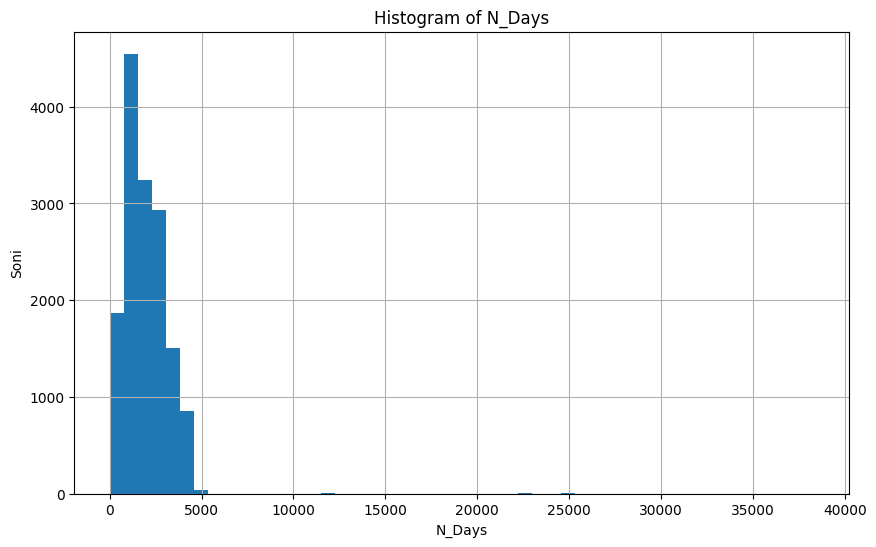

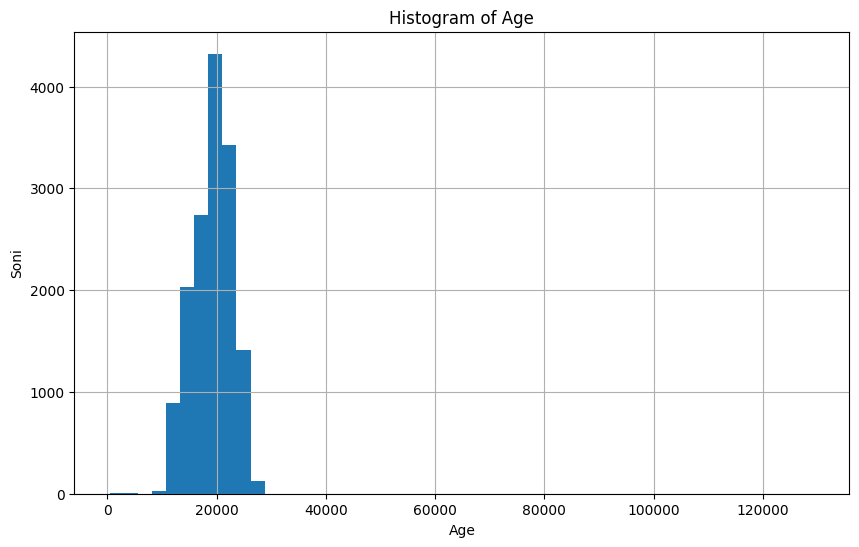

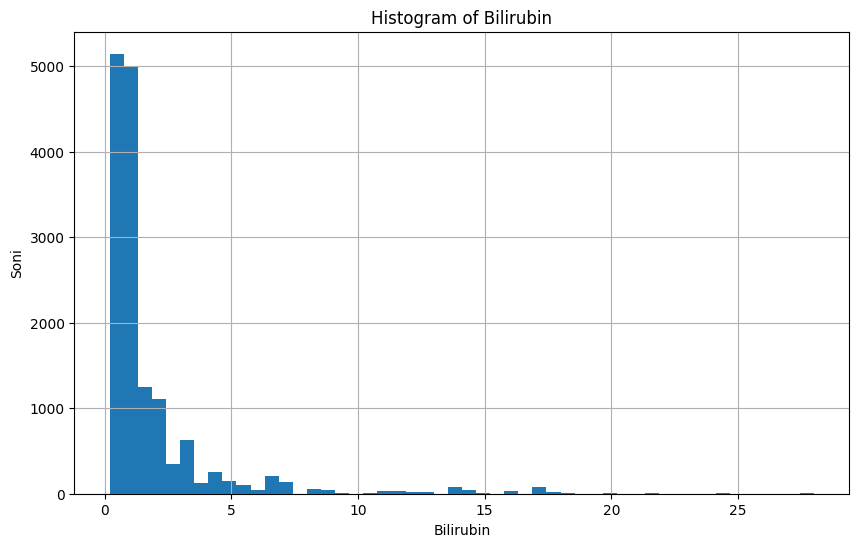

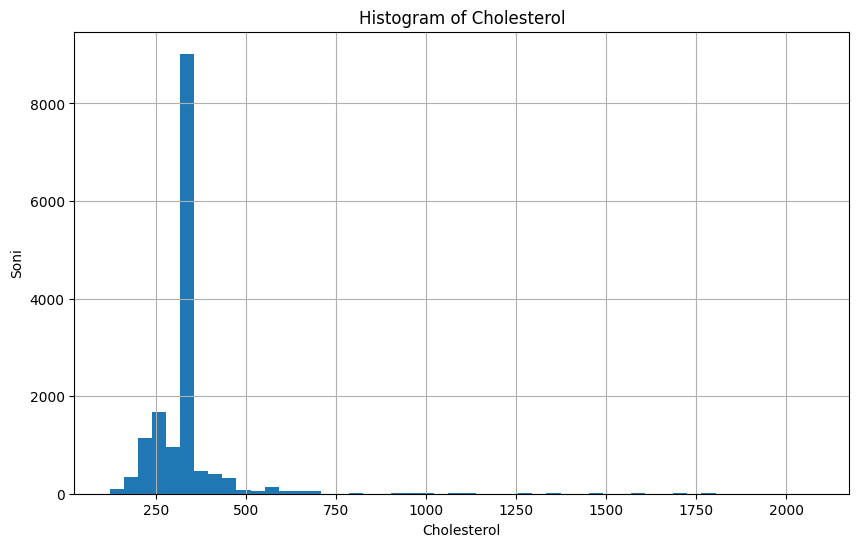

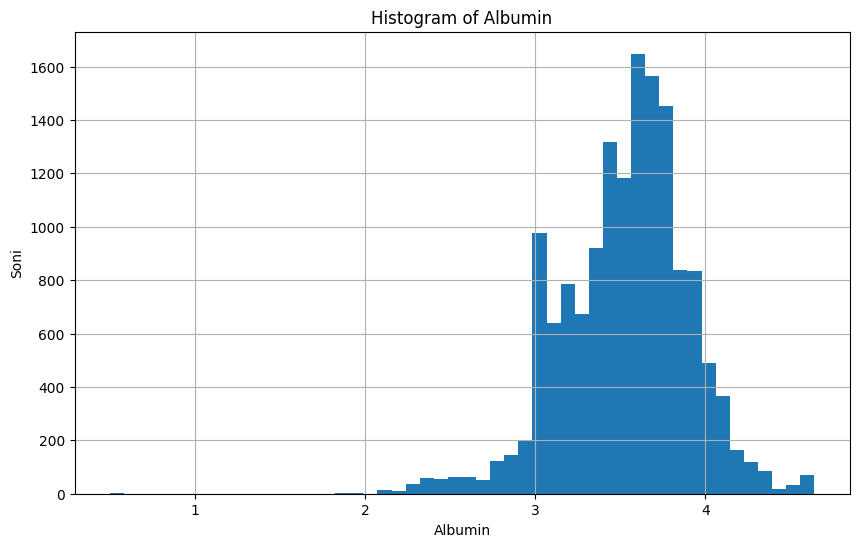

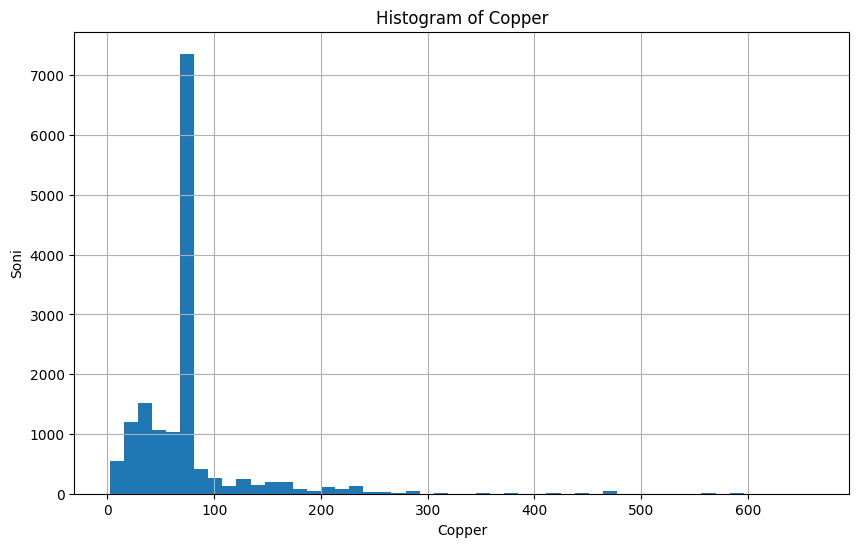

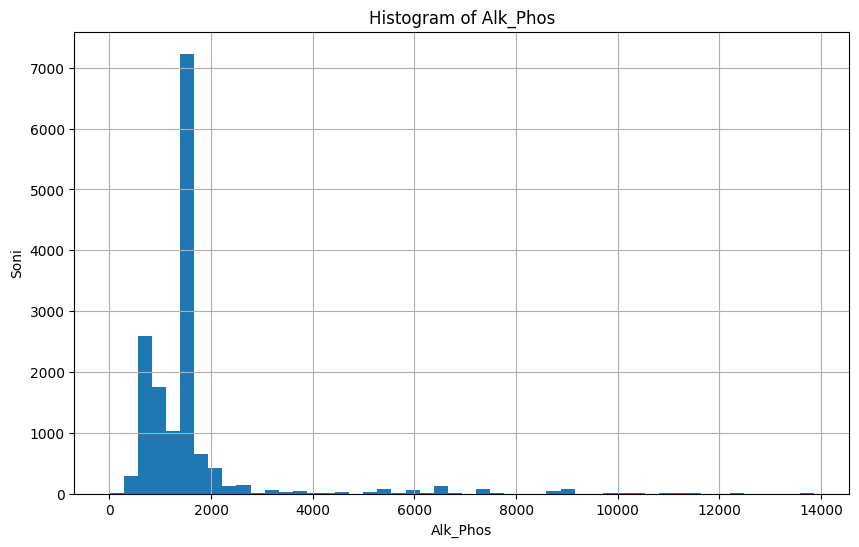

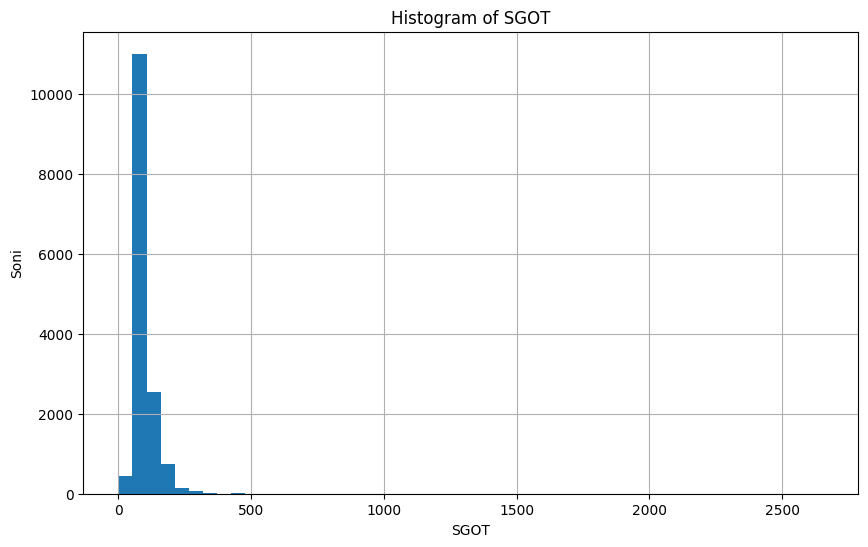

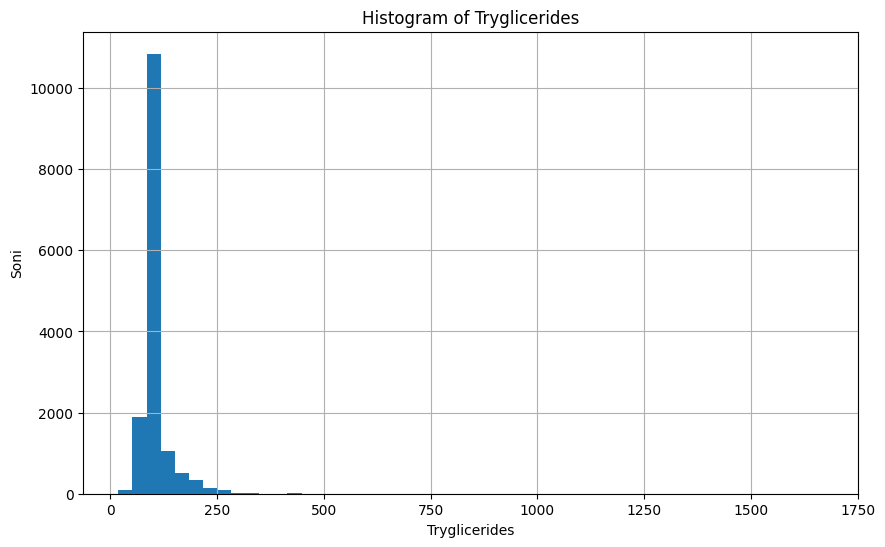

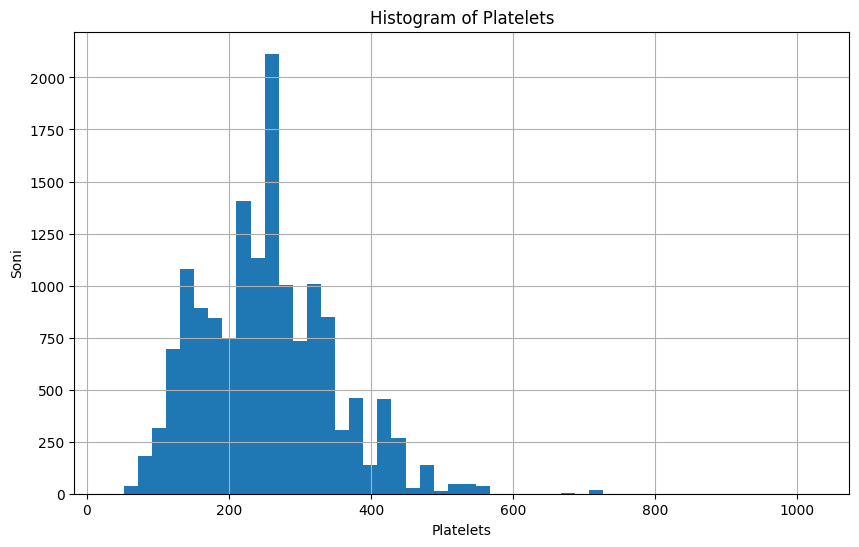

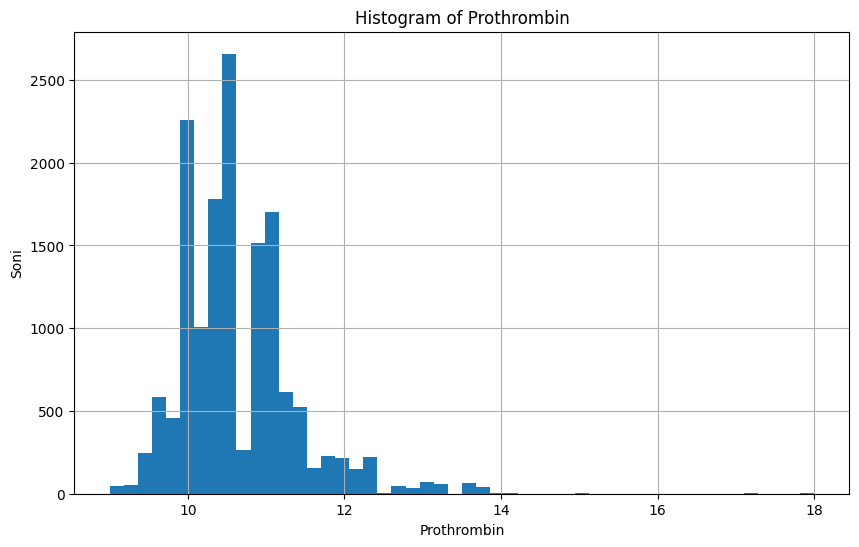

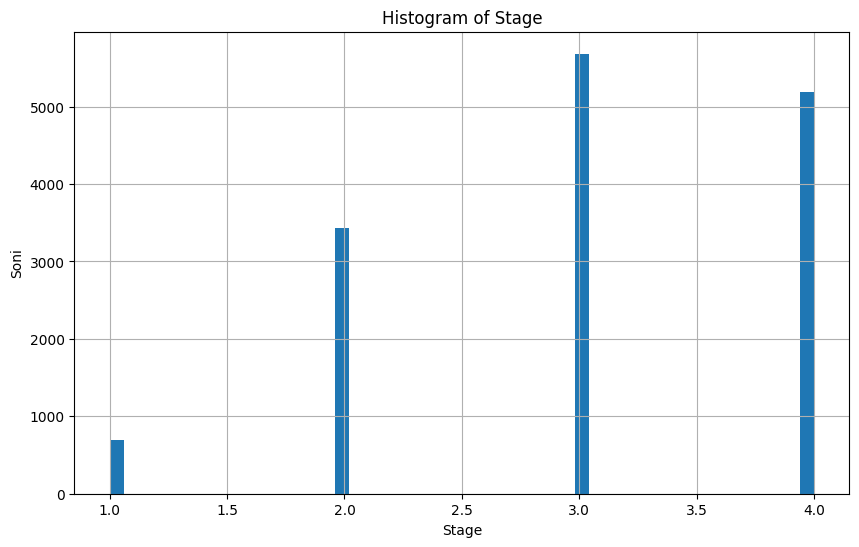

In [20]:
for col in numerical_features:
    plt.figure(figsize=(10, 6))
    # Faqat sonli qiymatlar qoldiramiz (NaN va stringlarni tashlab)
    clean_values = pd.to_numeric(df[col], errors='coerce').dropna()
    plt.hist(clean_values, bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Soni")
    plt.grid(True)
    plt.show()



### Visualization all categorical columns

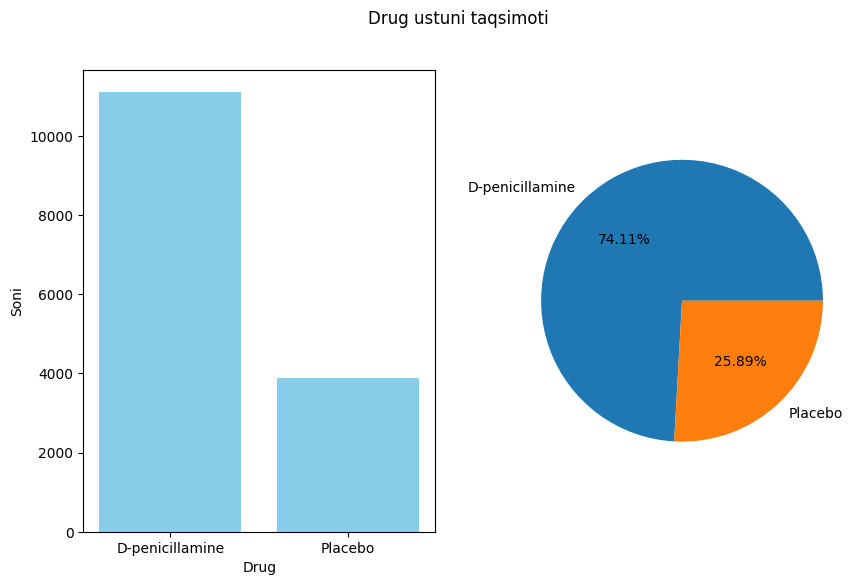

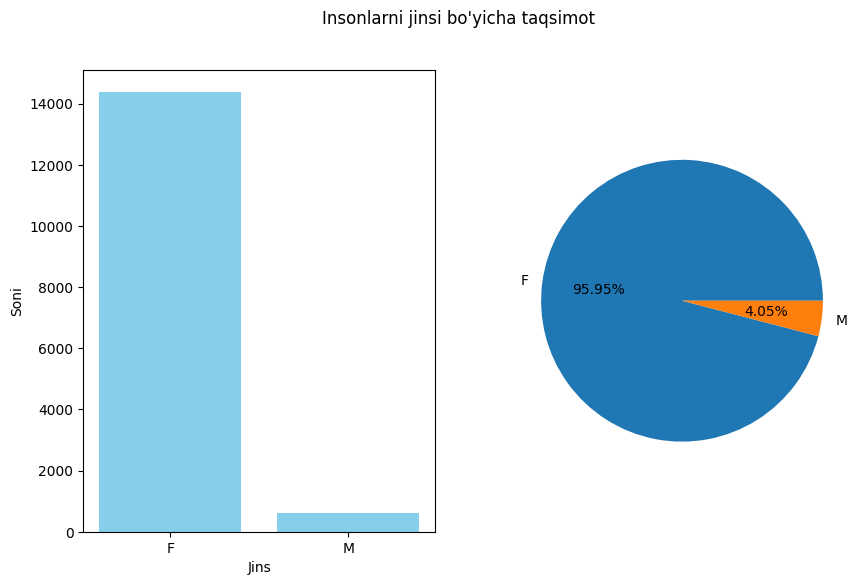

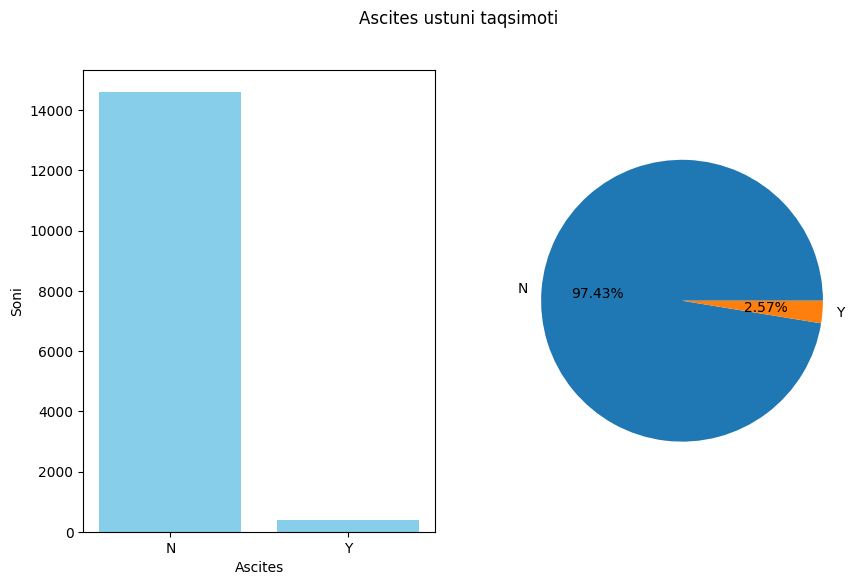

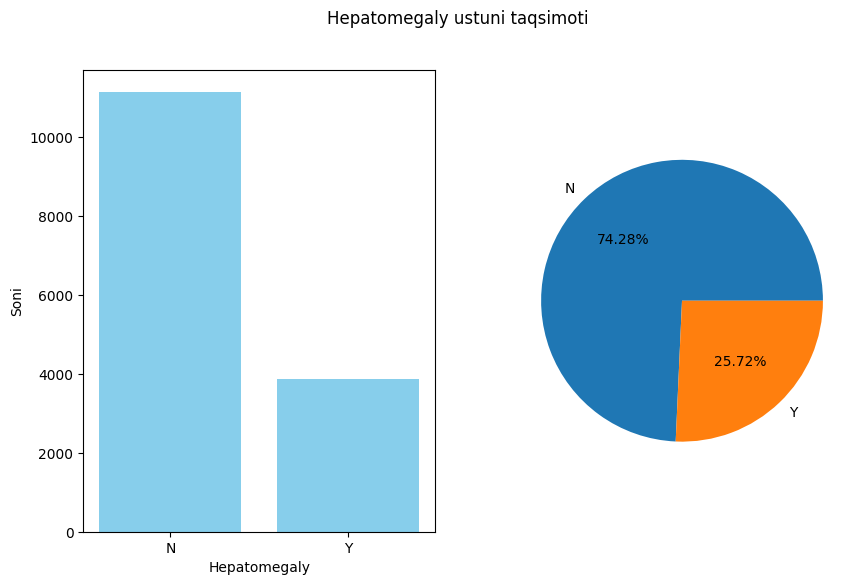

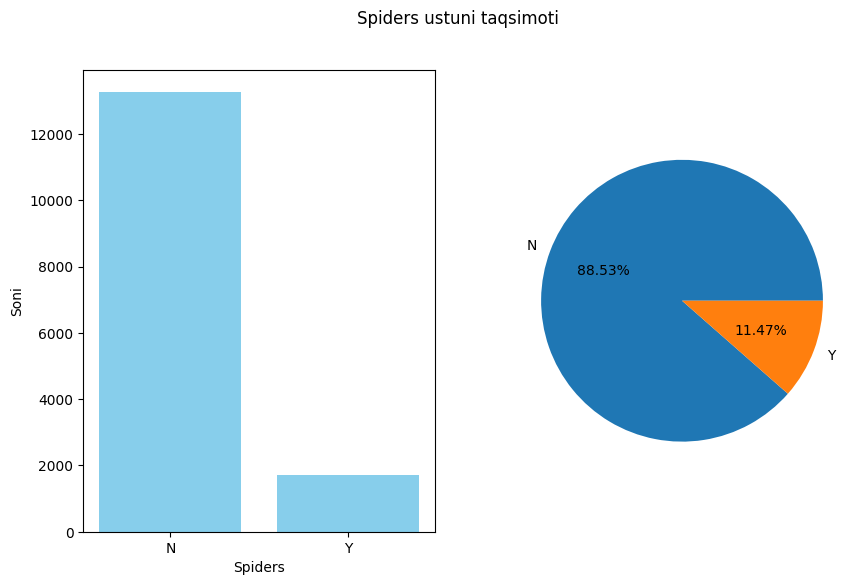

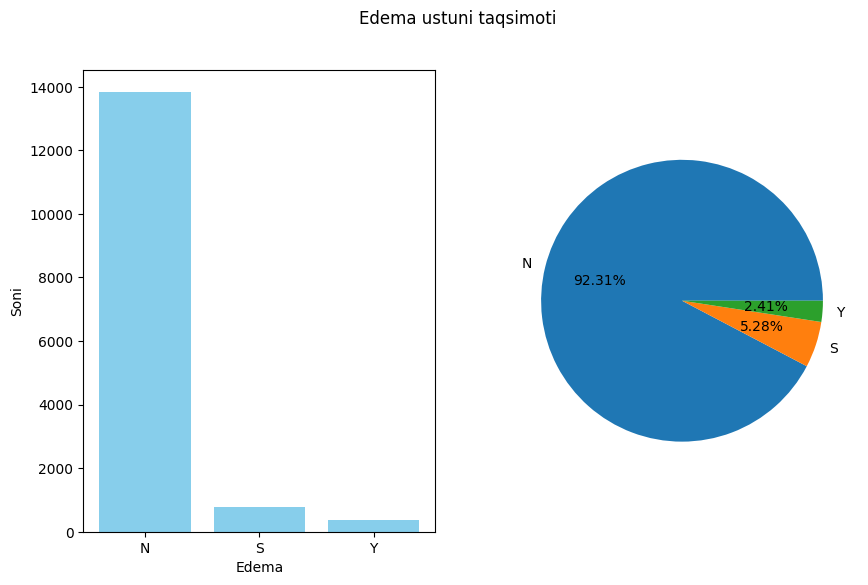

In [21]:
for col in categorical_features:
    if col == "Sex":
        classes = df[col].value_counts()
        
        # 1-graph Bar plot
        fig, ax = plt.subplots(1,2, figsize=(10, 6))
        ax[0].bar(classes.index, classes.values, color="skyblue")
        ax[0].set_xlabel("Jins")
        ax[0].set_ylabel('Soni')
    
        # 2-graph Pie chart
        ax[1].pie(classes.values, labels=classes.index, autopct="%1.2f%%")
    
        plt.suptitle("Insonlarni jinsi bo'yicha taqsimot")
        
    
    else: 
        classes = df[col].value_counts()
        
        # 1-graph Bar plot
        fig, ax = plt.subplots(1,2, figsize=(10,6))
        ax[0].bar(classes.index, classes.values, color="skyblue")
        ax[0].set_xlabel(col)
        ax[0].set_ylabel('Soni')
    
        # 2-graph Pie chart
        ax[1].pie(classes.values, labels=classes.index, autopct="%1.2f%%")
    
        plt.suptitle(f"{col} ustuni taqsimoti")
        plt.show()
        categorical_features = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
                        'Edema', ]
  

# ML

## MLga tayyorgarlik

In [22]:
scaler = StandardScaler()

numerical_features = [
    'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
    'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
    'Prothrombin', 'Stage'
]
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,0.154784,D-penicillamine,-0.770118,F,N,N,N,N,-0.503027,-0.549146,-0.876255,-0.583162,-0.382608,0.010787,-1.209685,1.919298,-1.403936,-0.028390,0
1,0.504209,D-penicillamine,-0.401461,F,N,N,N,N,-0.390871,-0.408087,0.198395,-0.958224,-0.707578,-1.033938,-0.855435,1.886781,3.248698,-0.028390,0
2,0.822891,Placebo,-0.383028,F,N,N,N,N,-0.278714,0.654004,2.347696,-0.386701,0.368133,0.839362,0.697818,-0.541124,-0.035515,-0.028390,0
3,0.183278,Placebo,-0.020427,F,N,Y,Y,N,-0.390871,-0.640420,0.467058,-0.708183,-0.583457,-1.178038,-1.509436,0.900445,-1.403936,1.119365,0
4,0.213271,Placebo,0.606026,F,N,N,N,N,1.067161,0.156149,-1.252382,6.935943,-0.494693,0.335012,0.943068,0.488568,0.511854,-1.176144,1


In [23]:
encoder = OrdinalEncoder()

categorical_features = [
    'Drug', 'Sex', 'Ascites', 'Hepatomegaly',
    'Spiders', 'Edema'
]
df[categorical_features] = encoder.fit_transform(df[categorical_features])
df.head()


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
id,,,,,,,,,,,,,,,,,,,
0,0.154784,0.0,-0.770118,0.0,0.0,0.0,0.0,0.0,-0.503027,-0.549146,-0.876255,-0.583162,-0.382608,0.010787,-1.209685,1.919298,-1.403936,-0.028390,0
1,0.504209,0.0,-0.401461,0.0,0.0,0.0,0.0,0.0,-0.390871,-0.408087,0.198395,-0.958224,-0.707578,-1.033938,-0.855435,1.886781,3.248698,-0.028390,0
2,0.822891,1.0,-0.383028,0.0,0.0,0.0,0.0,0.0,-0.278714,0.654004,2.347696,-0.386701,0.368133,0.839362,0.697818,-0.541124,-0.035515,-0.028390,0
3,0.183278,1.0,-0.020427,0.0,0.0,1.0,1.0,0.0,-0.390871,-0.640420,0.467058,-0.708183,-0.583457,-1.178038,-1.509436,0.900445,-1.403936,1.119365,0
4,0.213271,1.0,0.606026,0.0,0.0,0.0,0.0,0.0,1.067161,0.156149,-1.252382,6.935943,-0.494693,0.335012,0.943068,0.488568,0.511854,-1.176144,1


In [24]:
# train / test set
X = df.drop("Status", axis=1)
y = df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)

(11999, 18)
(3000, 18)


In [25]:
y_train

id
9838     1
7689     0
6557     0
6872     2
820      1
        ..
5191     1
13418    0
5390     0
860      0
7270     0
Name: Status, Length: 11999, dtype: int64

## Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2004
           1       0.81      0.67      0.74       922
           2       0.14      0.01      0.02        74

    accuracy                           0.83      3000
   macro avg       0.60      0.54      0.55      3000
weighted avg       0.82      0.83      0.82      3000

Accurcy: 83.2%
Log Loss: 0.4638036132991406


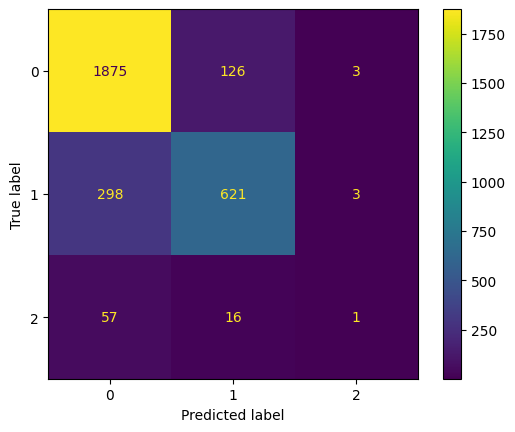

In [26]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
y_pred_proba = LR_model.predict_proba(X_test)  # Ehtimollikni olish

print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")
print(f"Log Loss: {metrics.log_loss(y_test, y_pred_proba, labels=LR_model.classes_)}")

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Random Forest Classifier

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2004
           1       0.79      0.76      0.77       922
           2       0.30      0.19      0.23        74

    accuracy                           0.84      3000
   macro avg       0.66      0.62      0.63      3000
weighted avg       0.84      0.84      0.84      3000

Accurcy: 84.3%
Log Loss: 0.4279555781804011


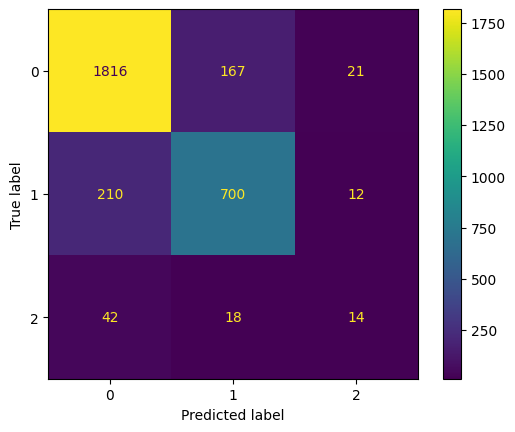

In [27]:
tree_model = RandomForestClassifier(class_weight='balanced', random_state=42, max_depth=14)
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
y_pred_proba = tree_model.predict_proba(X_test)  # Ehtimollikni olish

print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")
print(f"Log Loss: {metrics.log_loss(y_test, y_pred_proba, labels=tree_model.classes_)}")

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## **XGBoost**

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      2004
           1       0.81      0.75      0.78       922
           2       0.64      0.19      0.29        74

    accuracy                           0.85      3000
   macro avg       0.77      0.62      0.65      3000
weighted avg       0.85      0.85      0.85      3000

Accurcy: 85.2%
Log Loss: 0.39529723723546734


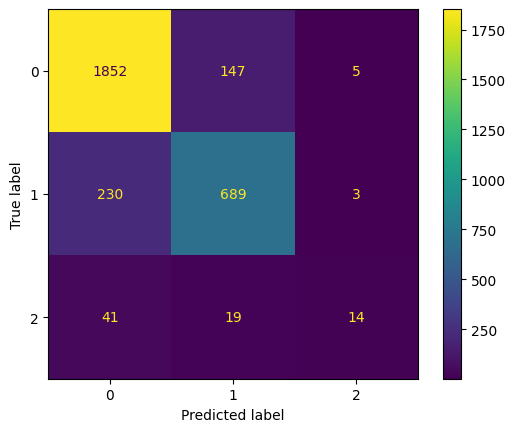

In [28]:
XGBoost = XGBClassifier()
XGBoost.fit(X_train, y_train)

# tekshirish
y_pred = XGBoost.predict(X_test)
y_pred_proba = XGBoost.predict_proba(X_test)  # Ehtimollikni olish
print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")
print(f"Log Loss: {metrics.log_loss(y_test, y_pred_proba, labels=XGBoost.classes_)}")

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print("\n")

## Support Vector Machine

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2004
           1       0.83      0.68      0.75       922
           2       0.00      0.00      0.00        74

    accuracy                           0.84      3000
   macro avg       0.56      0.54      0.55      3000
weighted avg       0.82      0.84      0.83      3000

Accurcy: 84.0%
Log Loss: 0.4509487406812613


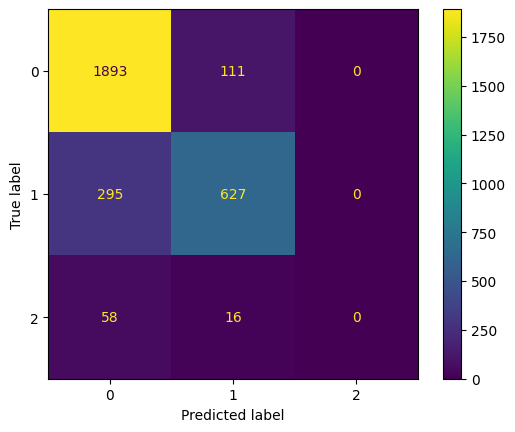

In [29]:
# model
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# tekshirish
y_pred = svm.predict(X_test)
y_pred_proba = svm.predict_proba(X_test)  # Ehtimollikni olish
print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")
print(f"Log Loss: {metrics.log_loss(y_test, y_pred_proba, labels=svm.classes_)}")


# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print("\n")

## CatBoostClassifier

0:	test: 0.8369390	best: 0.8369390 (0)	total: 65.9ms	remaining: 1m 5s
100:	test: 0.8996792	best: 0.8996792 (100)	total: 910ms	remaining: 8.1s
200:	test: 0.9066007	best: 0.9066134 (199)	total: 1.68s	remaining: 6.68s
300:	test: 0.9109642	best: 0.9110623 (291)	total: 2.46s	remaining: 5.71s
400:	test: 0.9138396	best: 0.9140006 (397)	total: 3.24s	remaining: 4.84s
500:	test: 0.9148231	best: 0.9148231 (500)	total: 4.01s	remaining: 3.99s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9158782989
bestIteration = 544

Shrink model to first 545 iterations.
Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2004
           1       0.75      0.77      0.76       922
           2       0.20      0.54      0.29        74

    accuracy                           0.81      3000
   macro avg       0.62      0.72      0.64      3000
weighted avg       0.84      0.81      0.82      3000

Accurcy: 80.9%
Log Loss

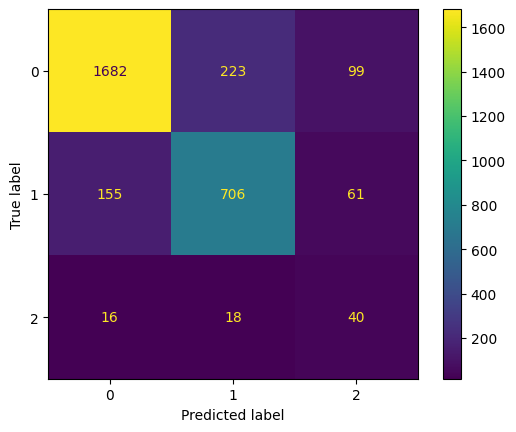

In [30]:
# model
# barcha kategorik ustunlarni aniqlash
categorical_columns = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
model = CatBoostClassifier(
    iterations=1000,              
    learning_rate=0.05,           
    depth=6,                     
    l2_leaf_reg=3,                
    auto_class_weights='Balanced',   
    cat_features=categorical_columns,   
    eval_metric='AUC',            
    early_stopping_rounds=50,     
    task_type='CPU',              
    verbose=100,                  
    random_seed=42)   
# Modelni o‘qitish
model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),    
    use_best_model=True         
)

# tekshirish
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Ehtimollikni olish
print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")
print(f"Log Loss: {metrics.log_loss(y_test, y_pred_proba, labels=model.classes_)}")

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print("\n")


## Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2004
           1       0.68      0.70      0.69       922
           2       0.13      0.15      0.14        74

    accuracy                           0.78      3000
   macro avg       0.55      0.56      0.56      3000
weighted avg       0.78      0.78      0.78      3000

Accurcy: 77.8%
Log Loss: 7.989676501254302


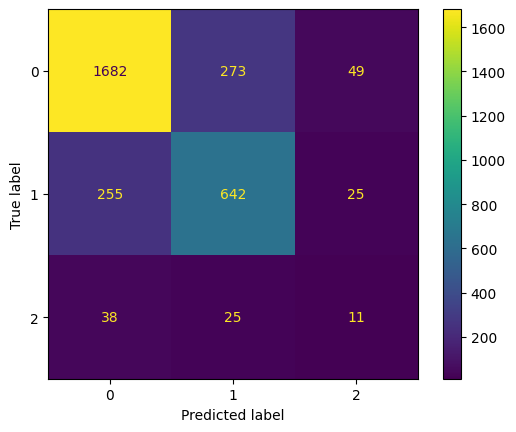

In [31]:
# model
D_tree = DecisionTreeClassifier()
D_tree.fit(X_train, y_train)

# tekshirish
y_pred = D_tree.predict(X_test)
y_pred_proba = D_tree.predict_proba(X_test)  # Ehtimollikni olish
print(f"Classification Report:\n\n{metrics.classification_report(y_test, y_pred)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_pred)*100:.1f}%")
print(f"Log Loss: {metrics.log_loss(y_test, y_pred_proba, labels=D_tree.classes_)}")


# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print("\n")

# Modellarimiz eng kichik `loss` qiymatini qaytargani `XGBoost Classifier`i bo'ldi endi  predict uchun shu modelni ishlatamiz

In [32]:
df_for_pred = pd.read_csv("/kaggle/input/multiclassificationtask/test.csv", index_col=0)
df_for_pred.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,,,,,,,,,
15000,22646.0,NaN,22646.0,F,NaN,NaN,NaN,N,1.4,NaN,3.34,NaN,NaN,NaN,NaN,190.0,11.0,4.0
15001,2149.0,NaN,18993.0,F,NaN,NaN,NaN,N,0.9,NaN,3.24,NaN,NaN,NaN,NaN,233.0,9.0,2.0
15002,3850.0,D-penicillamine,16050.0,M,N,N,N,N,1.0,460.0,3.64,75.0,2148.0,102.3,118.0,172.0,10.6,3.0
15003,2419.0,D-penicillamine,20354.0,F,N,N,N,N,0.6,258.0,3.96,31.0,642.0,70.0,83.0,336.0,10.8,2.0
15004,1086.0,NaN,23376.0,F,NaN,NaN,NaN,N,4.4,NaN,4.40,NaN,NaN,NaN,NaN,447.0,10.3,2.0


In [33]:
df2 = df_for_pred.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15000 to 24999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         10000 non-null  float64
 1   Drug           5602 non-null   object 
 2   Age            10000 non-null  float64
 3   Sex            10000 non-null  object 
 4   Ascites        5609 non-null   object 
 5   Hepatomegaly   5598 non-null   object 
 6   Spiders        5596 non-null   object 
 7   Edema          10000 non-null  object 
 8   Bilirubin      10000 non-null  float64
 9   Cholesterol    4353 non-null   float64
 10  Albumin        10000 non-null  float64
 11  Copper         5531 non-null   float64
 12  Alk_Phos       5597 non-null   float64
 13  SGOT           5594 non-null   float64
 14  Tryglicerides  4320 non-null   float64
 15  Platelets      9618 non-null   float64
 16  Prothrombin    9991 non-null   float64
 17  Stage          10000 non-null  float64
dtypes: floa

In [34]:
# NaN qiymatlarni to'ldirish
for col in numerical_features:
    df2[col] = df2[col].fillna(df2[col].mean())

for col in categorical_features:
    if df2[col].mode().empty:
        df2[col] = df2[col].fillna("Unknown")
    else:
        df2[col] = df2[col].fillna(df2[col].mode()[0])

    

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15000 to 24999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         10000 non-null  float64
 1   Drug           10000 non-null  object 
 2   Age            10000 non-null  float64
 3   Sex            10000 non-null  object 
 4   Ascites        10000 non-null  object 
 5   Hepatomegaly   10000 non-null  object 
 6   Spiders        10000 non-null  object 
 7   Edema          10000 non-null  object 
 8   Bilirubin      10000 non-null  float64
 9   Cholesterol    10000 non-null  float64
 10  Albumin        10000 non-null  float64
 11  Copper         10000 non-null  float64
 12  Alk_Phos       10000 non-null  float64
 13  SGOT           10000 non-null  float64
 14  Tryglicerides  10000 non-null  float64
 15  Platelets      10000 non-null  float64
 16  Prothrombin    10000 non-null  float64
 17  Stage          10000 non-null  float64
dtypes: floa

In [36]:
scaler = StandardScaler()

numerical_features = [
    'N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin',
    'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
    'Prothrombin', 'Stage'
]
df2[numerical_features] = scaler.fit_transform(df2[numerical_features])
df2.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,,,,,,,,,
15000,14.837089,D-penicillamine,0.825194,F,N,N,N,N,-0.163520,0.000000,-0.474441,0.000000,0.000000,7.491508e-17,4.359120e-16,-0.647771,0.496810,1.112149
15001,0.123156,D-penicillamine,-0.090227,F,N,N,N,N,-0.339241,0.000000,-0.739037,0.000000,0.000000,7.491508e-17,4.359120e-16,-0.220612,-2.215852,-1.156154
15002,1.344232,D-penicillamine,-0.827726,M,N,N,N,N,-0.304097,1.080930,0.319346,0.005336,0.376229,-3.712068e-02,2.393327e-01,-0.826582,-0.045722,-0.022003
15003,0.316977,D-penicillamine,0.250832,F,N,N,N,N,-0.444674,-0.596633,1.166052,-0.810657,-0.727611,-2.073959e-01,-8.342776e-01,0.802584,0.225544,-1.156154
15004,-0.639927,D-penicillamine,1.008127,F,N,N,N,N,0.890811,0.000000,2.330274,0.000000,0.000000,7.491508e-17,4.359120e-16,1.905252,-0.452622,-1.156154


In [37]:
encoder = OrdinalEncoder()

categorical_features = [
    'Drug', 'Sex', 'Ascites', 'Hepatomegaly',
    'Spiders', 'Edema'
]
df2[categorical_features] = encoder.fit_transform(df2[categorical_features])
df2.head()


,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
id,,,,,,,,,,,,,,,,,,
15000,14.837089,0.0,0.825194,0.0,0.0,0.0,0.0,0.0,-0.163520,0.000000,-0.474441,0.000000,0.000000,7.491508e-17,4.359120e-16,-0.647771,0.496810,1.112149
15001,0.123156,0.0,-0.090227,0.0,0.0,0.0,0.0,0.0,-0.339241,0.000000,-0.739037,0.000000,0.000000,7.491508e-17,4.359120e-16,-0.220612,-2.215852,-1.156154
15002,1.344232,0.0,-0.827726,1.0,0.0,0.0,0.0,0.0,-0.304097,1.080930,0.319346,0.005336,0.376229,-3.712068e-02,2.393327e-01,-0.826582,-0.045722,-0.022003
15003,0.316977,0.0,0.250832,0.0,0.0,0.0,0.0,0.0,-0.444674,-0.596633,1.166052,-0.810657,-0.727611,-2.073959e-01,-8.342776e-01,0.802584,0.225544,-1.156154
15004,-0.639927,0.0,1.008127,0.0,0.0,0.0,0.0,0.0,0.890811,0.000000,2.330274,0.000000,0.000000,7.491508e-17,4.359120e-16,1.905252,-0.452622,-1.156154


In [38]:
# Qiymatlarni predict qilamiz
X = df2.copy()
proba = XGBoost.predict_proba(X)

In [39]:
sample_submission = pd.read_csv("/kaggle/input/multiclassificationtask/sample_submission.csv")
sample_submission

,id,Status_C,Status_CL,Status_D
0,15000,0.628084,0.034788,0.337128
1,15001,0.628084,0.034788,0.337128
2,15002,0.628084,0.034788,0.337128
3,15003,0.628084,0.034788,0.337128
4,15004,0.628084,0.034788,0.337128
...,...,...,...,...
9995,24995,0.628084,0.034788,0.337128
9996,24996,0.628084,0.034788,0.337128
9997,24997,0.628084,0.034788,0.337128
9998,24998,0.628084,0.034788,0.337128


In [40]:
submission = pd.DataFrame({
    "id":df2.index, 
    "Status_C":proba[:, 0], 
    "Status_CL":proba[:, 1],
    "Status_D":proba[:, 2]
})
submission

,id,Status_C,Status_CL,Status_D
0,15000,0.874750,0.123232,0.002018
1,15001,0.900812,0.084810,0.014378
2,15002,0.834854,0.161504,0.003642
3,15003,0.985429,0.014328,0.000243
4,15004,0.782777,0.180441,0.036782
...,...,...,...,...
9995,24995,0.987670,0.011023,0.001307
9996,24996,0.007409,0.991138,0.001452
9997,24997,0.927830,0.066840,0.005330
9998,24998,0.997110,0.002878,0.000012


In [41]:
submission.to_csv("submission_me.csv")